In [1]:
import tcav.utils_plot as utils_plot
from tcav.utils import pickle_load
from config import root_dir, model_to_run, bottlenecks, concepts, version, num_random_exp, max_examples, run_parallel, num_workers
from tcav.utils_analysis import get_score_dist, get_random_cav, get_logit_grad, cos_sim
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [4]:
# project_names =['GoogleNet_mixed3a_mixed4a_mixed4c_mixed4e_mixed5b:fire engine:blue_green_red_yellow_0','GoogleNet_mixed3a_mixed4a_mixed4c_mixed4e_mixed5b:zebra:dotted_striped_zigzagged_0']
# results_path = [root_dir + 'log/' + name + '/tcavs/Results' for name in project_names]

In [2]:

project_names = '2layers-colored-mnist-number_10'
keyword = 'mnist-0'
keyword2 = 'mnist'
exceptword = 'logit'
exceptword2 = 'grad'
results_lst = []
cavs_path = root_dir + 'log/' + project_names + '/cavs/'
random_tcav_path = root_dir + 'log/' + project_names + '/random100/'
random_cav_path = root_dir + 'log/' + project_names + '/random100/cavs'

# results(random同士なし)をロードしてrandomと結合
results_path = os.listdir(root_dir + 'log/' + project_names + '/tcavs')
results_path.sort()
results_all_lst = []
results_non_dup_lst = []
for path in results_path:
    if exceptword2 not in path and exceptword not in path and keyword in path and keyword2 in path:
        try:
            #random_all = pickle_load(random_tcav_path + path.split(':')[1] + '_results_all:grad_nomalize')
            #random_non_dup = pickle_load(random_tcav_path + path.split(':')[1] + '_results_non_dup:grad_nomalize')
            random_all = pickle_load(random_tcav_path + path.split(':')[1] + '_results_all')
            random_non_dup = pickle_load(random_tcav_path + path.split(':')[1] + '_results_non_dup')
        except:
            continue
        results_all = pickle_load(root_dir + 'log/' + project_names + '/tcavs/' + path)
        results_non_dup = pickle_load(root_dir + 'log/' + project_names + '/tcavs/' + path)
        results_all.extend(random_all)
        results_non_dup.extend(random_non_dup)

        results_all_lst.append(results_all)
        results_non_dup_lst.append(results_non_dup)
        print(path)

conv1_conv2:mnist-0:imagenet-blue_imagenet-green_imagenet-red_imagenet-purple_imagenet-yellow_50_0706
conv1_conv2:mnist-0:roundness_straight_sharpness_50_0706


## TCAV スコア

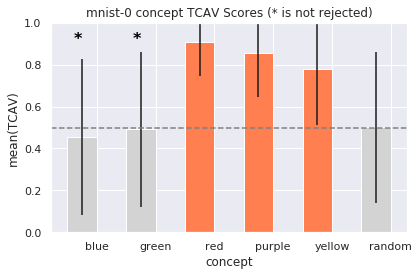

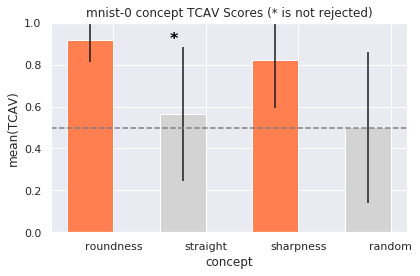

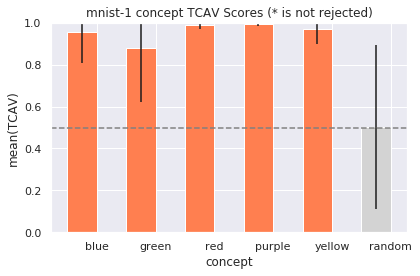

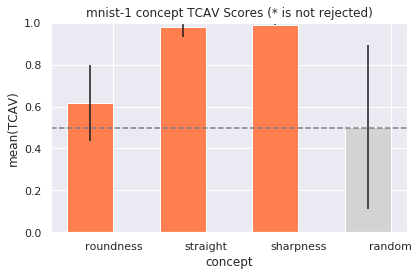

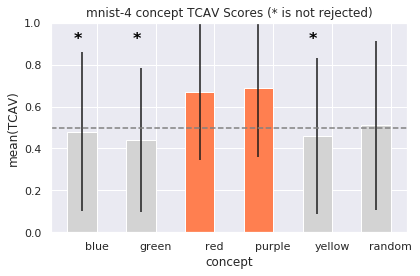

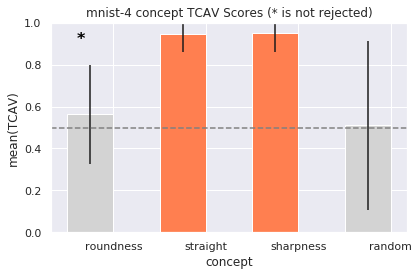

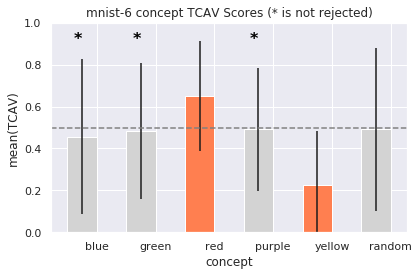

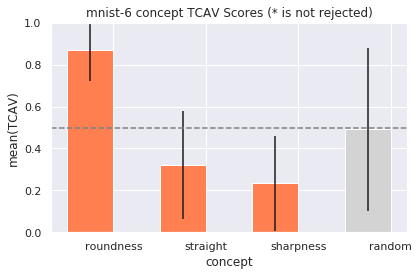

In [3]:
import importlib
import seaborn as sns
sns.set()

importlib.reload(utils_plot)
for i,results in enumerate(results_all_lst):
    #utils_plot.plot_results(results, num_random_exp=num_random_exp, save_path = root_dir + 'log/' + project_names + '/plot',keyword='color_'+str(i))
    utils_plot.plot_results(results, num_random_exp=num_random_exp)

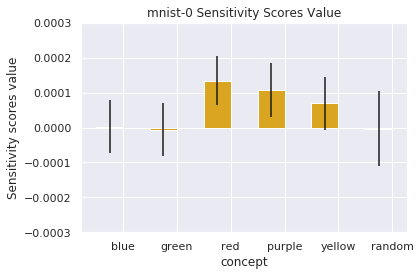

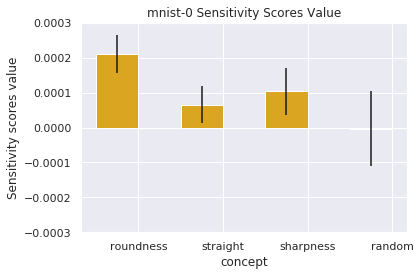

In [34]:
import importlib
importlib.reload(utils_plot)
for i,results in enumerate(results_all_lst):
    utils_plot.plot_sensitivity_results(results, num_random_exp=num_random_exp, save_path = root_dir + 'log/' + project_names + '/plot',keyword='simi'+str(i))
    #utils_plot.plot_sensitivity_results(results)

In [12]:
random_i_ups = {}
for result in results_all_lst[0]:
    # store random
    if 'random500_' in result['cav_concept']:
        print(result['val_directional_dirs'])
        あ

[0.016777515579407903, 0.001315018431930046, 1.0329960117903255e-07, 1.7819041942228953e-05, 1.4384351840992758e-07, 2.910458700759296e-06, 1.5173783610873115e-05, 0.0011675016536906863, 0.0005403045533359114, 1.9728764372622767e-07, 4.14384549268831e-09, 5.990393781111919e-07, 1.0292734741000323e-07, 8.836011197511468e-08, 4.789385830988468e-06, 0.00010989180306220569, 1.5595210578566295e-07, 1.4376671788853552e-06, 0.015668897583112528, 1.5465838232161332e-07, 8.386683722414497e-10, 3.6239032595140974e-08, 0.001493454925092973, 2.537918828150932e-10, 3.1022907727919463e-10, 2.7860778574851385e-07, 0.008796629447126187, 6.430501372012881e-10, 0.004710657909512663, 4.72485619833429e-09, 3.026089318145751e-05, 3.3431668944332185e-13, 2.598853165952741e-06, 0.001032215465930997, 2.067997481548275e-11, 4.314235378600888e-06, 6.43186388848582e-08, 1.893560254681135e-05, -1.3073364917594614e-05, 2.0241884788325083e-05, 1.373141659580234e-07, 5.314550013907265e-10, 1.1245034331767942e-07, 0.

NameError: name 'あ' is not defined

In [16]:
bottlenecks = ['conv1']
targets = ['mnist-0','mnist-1','mnist-4','mnist-5','mnist-6']
targets = ['mnist-0']

cos_simirarity_score = {}
simirarity_score = {}
for target in targets:
    simirarity_score[target] = {}
    cos_simirarity_score[target] = {}
    for bottleneck in bottlenecks:
        if bottleneck not in simirarity_score[target]:
            simirarity_score[target][bottleneck] = {}
            simirarity_score[target][bottleneck]['mean'] = []
            simirarity_score[target][bottleneck]['std'] = []
            cos_simirarity_score[target][bottleneck] = {}
            cos_simirarity_score[target][bottleneck]['mean'] = []
            cos_simirarity_score[target][bottleneck]['std'] = []
        logit_grad = get_logit_grad(cavs_path, bottleneck, target)
        cav = get_random_cav(random_cav_path, bottleneck)
        s_simi_lst = []
        cos_s_simi_lst = []
        for c in cav:
            for lg in logit_grad:
                cos_s_simi = np.array(cos_sim(lg,c))
                s_simi = np.array(np.dot(lg,c))
                cos_s_simi_lst.append(cos_s_simi)
                s_simi_lst.append(s_simi)
        simirarity_score[target][bottleneck]['mean'].append(np.mean(s_simi_lst))
        simirarity_score[target][bottleneck]['std'].append(np.std(s_simi_lst))
        cos_simirarity_score[target][bottleneck]['mean'].append(np.mean(cos_s_simi_lst))
        cos_simirarity_score[target][bottleneck]['std'].append(np.std(cos_s_simi_lst))

In [17]:
simirarity_score

{'mnist-0': {'conv1': {'mean': [5.22900827297228e-05],
   'std': [0.008455081162362257]}}}

In [19]:
cos_simirarity_score

{'mnist-0': {'conv1': {'mean': [0.0012737717751055845],
   'std': [0.018109418404532052]}}}

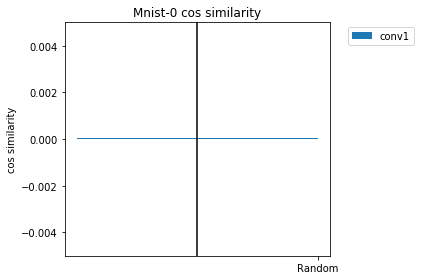

In [24]:
plot_concepts = ['Random']
for target in targets:
    save_path = root_dir + 'log/' + project_names + '/plot'
    num_bottlenecks = len(bottlenecks)
    num_concepts = len(plot_concepts)
    bar_width = 0.35
    index = np.arange(num_concepts) * bar_width * (num_bottlenecks + 1)
    # matplotlib
    fig, ax = plt.subplots()
    # draw all bottlenecks individually
    for i, [bn, vals] in enumerate(simirarity_score[target].items()):
        bar = ax.bar(index + i * bar_width, vals['mean'],
            bar_width, yerr=vals['std'], label=bn)
    target_class = target.title()
    ax.set_title('{} cos similarity'.format(target_class))
    ax.set_ylabel('cos similarity')
    # ax.set_xlabel(xlabel_name)
    y_range = 0.005
    ax.set_ylim(-y_range, y_range)
    ax.set_xticks(index + num_bottlenecks * bar_width / 2)
    #plt.xticks(fontsize=8)
    ax.set_xticklabels(plot_concepts)
    ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
    #plt.savefig(f'{save_path}/{target}:{num_concepts}:cos_similarity.eps')
    plt.show()

## TCAVスコアの分布を可視化

In [2]:
for results in results_all_lst[:1]:
    dist = get_score_dist(results)
    for concept in dist:
        if concept != 'random':
            for bottleneck in dist[concept]:
                concept_label = '{} N = {}'.format(concept, len(dist[concept][bottleneck])) 
                random_label = 'random N = {}'.format(len(dist['random'][bottleneck]))
                plt.figure()
                plt.hist(dist[concept][bottleneck], bins=100, alpha=0.3, histtype='stepfilled', color='r',label= concept_label)
                plt.hist(dist['random'][bottleneck], bins=100, alpha=0.3, histtype='stepfilled', color='b',label = random_label)
                plt.legend()
                plt.title(bottleneck)
                plt.show()

NameError: name 'results_all_lst' is not defined

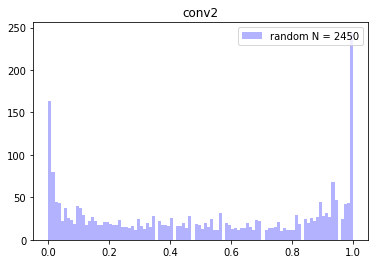

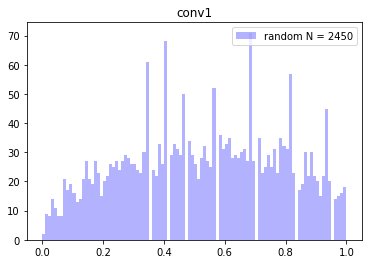

In [12]:
# random
#for results in results_non_dup_lst[:1]:
for results in results_all_lst[:1]:
    dist = get_score_dist(results)
    for concept in dist:
        if concept == 'random':
            for bottleneck in dist[concept]:
                concept_label = '{} N = {}'.format(concept, len(dist[concept][bottleneck])) 
                random_label = 'random N = {}'.format(len(dist['random'][bottleneck]))
                plt.figure()
                plt.hist(dist['random'][bottleneck], bins=100, alpha=0.3, histtype='stepfilled', color='b',label = random_label)
                plt.legend()
                plt.title(bottleneck)
                plt.show()

## CAVの分離精度を確認

In [35]:
# conceptごとに
for results in results_all_lst[:1]:
    cav_accuracy = utils_plot.get_cav_accuracy(results)
    for concept in cav_accuracy:
        if concept != 'random':
            for bottleneck in cav_accuracy[concept]:
                print('---------------------------------')
                print('{}:{} vs random'.format(bottleneck,concept))
                concept_acc = [list(ele.values())[0] for ele in cav_accuracy[concept][bottleneck]]
                random_acc = [list(ele.values())[1] for ele in cav_accuracy[concept][bottleneck]]
                print('CAV concept accuracy : {} ± {}'.format(np.mean(concept_acc),np.std(concept_acc)))
                print('CAV random accuracy : {} ± {}'.format(np.mean(random_acc),np.std(random_acc)))

        else:
            for bottleneck in cav_accuracy[concept]:
                print('---------------------------------')
                print('{}:random vs random'.format(bottleneck))
                acc = [list(ele.values())[2] for ele in cav_accuracy[concept][bottleneck]]
                print('CAV random accuracy : {} ± {}'.format(np.mean(acc),np.std(acc)))

---------------------------------
mixed3a:blue vs random
CAV concept accuracy : 0.9436029411764707 ± 0.05810038033870115
CAV random accuracy : 0.9951470588235294 ± 0.016465335296798125
---------------------------------
mixed4a:blue vs random
CAV concept accuracy : 0.9178676470588235 ± 0.06543543431516172
CAV random accuracy : 0.9925735294117647 ± 0.026780154720449454
---------------------------------
mixed4c:blue vs random
CAV concept accuracy : 0.9544117647058823 ± 0.060303083981801994
CAV random accuracy : 0.984264705882353 ± 0.035735899292866496
---------------------------------
mixed4e:blue vs random
CAV concept accuracy : 0.9427205882352943 ± 0.060083428516962495
CAV random accuracy : 0.9736029411764707 ± 0.0401977298202145
---------------------------------
mixed5b:blue vs random
CAV concept accuracy : 0.9185294117647059 ± 0.06930263105597274
CAV random accuracy : 0.9750735294117646 ± 0.044339454670580127
---------------------------------
mixed3a:green vs random
CAV concept accura

In [10]:
# conceptをまとめる
for results in results_all_lst[:1]:
    cav_accuracy = utils_plot.get_cav_accuracy(results)
    for bottleneck in cav_accuracy['random']:
        print('===============================')
        print('bottleneck is {}'.format(bottleneck))
        concept_acc = []
        random_acc = []
        for concept in cav_accuracy:
            if concept != 'random':
                concept_acc.extend([list(ele.values())[0] for ele in cav_accuracy[concept][bottleneck]])
                random_acc.extend([list(ele.values())[1] for ele in cav_accuracy[concept][bottleneck]])

        print('---------------------------------')
        print('concept vs random')
        print('CAV concept accuracy : {} ± {}'.format(np.mean(concept_acc),np.std(concept_acc)))
        print('CAV random accuracy : {} ± {}'.format(np.mean(random_acc),np.std(random_acc)))

        print('---------------------------------')
        print('random vs random'.format(bottleneck))
        acc = [list(ele.values())[2] for ele in cav_accuracy['random'][bottleneck]]
        print('CAV random accuracy : {} ± {}'.format(np.mean(acc),np.std(acc)))

bottleneck is mixed4c
---------------------------------
concept vs random
CAV concept accuracy : 0.9352626050420167 ± 0.08903076613659305
CAV random accuracy : 0.9709348739495798 ± 0.05389613757403528
---------------------------------
random vs random
CAV random accuracy : 0.49875077303648735 ± 0.08036650815227432
bottleneck is mixed5b
---------------------------------
concept vs random
CAV concept accuracy : 0.9194642857142858 ± 0.08476361039023744
CAV random accuracy : 0.9534348739495798 ± 0.06379827093671514
---------------------------------
random vs random
CAV random accuracy : 0.4982189239332096 ± 0.08464955106321942
bottleneck is mixed4e
---------------------------------
concept vs random
CAV concept accuracy : 0.9401785714285714 ± 0.07933372641161299
CAV random accuracy : 0.9544642857142858 ± 0.06654453217622076
---------------------------------
random vs random
CAV random accuracy : 0.49751391465677186 ± 0.08394253022304686
bottleneck is mixed4a
-------------------------------

In [3]:
bottlenecks = ['conv2']
sim_all = []
for bottleneck in bottlenecks:
    cav = get_random_cav(random_cav_path, bottleneck)
    sim_lst = []
    for v in itertools.combinations(np.arange(len(cav)), 2):
        sim = cos_sim(cav[v[0]],cav[v[1]])
        sim_lst.append(sim)
    sim_all.append(sim_lst)
#plt.title('Cos Similarity in ' + concept +  ' CAV')
plt.hist(sim_all[0], bins=100, alpha=0.3, histtype='stepfilled', color='b',label=bottlenecks[0])
plt.hist(sim_all[1], bins=100, alpha=0.3, histtype='stepfilled', color='r',label=bottlenecks[1])
plt.xlabel('cos_similarity')
plt.ylim(0,50)
plt.legend()
#plt.savefig(root_dir + 'log/' + project_names + '/plot/cav_simi-'+concept)
plt.show()

IndexError: list index out of range

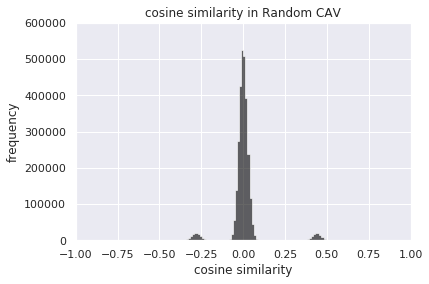

In [9]:
import seaborn as sns
sns.set()
plt.hist(sim_all[0], bins=100, alpha=0.6, histtype='stepfilled', color='black',label=bottlenecks[0]);
plt.title('cosine similarity in Random CAV')
plt.xlabel('cosine similarity')
plt.ylim(0,600000)
plt.xlim(-1,1)
plt.ylabel('frequency')
plt.savefig(root_dir + 'log/' + project_names + '/plot/cav_simi_hist-random.eps')
plt.show()

In [5]:
random_cav_path 

'/home/tomohiro/code/tcav/log/2layers-colored-mnist-number_10/random100/cavs'